In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.master('local[2]').appName("Sunny").getOrCreate()
spark

In [3]:
data = spark.read.csv('churn.csv', inferSchema = True, header = True)

In [4]:
data.show()

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|state|account length|area code|phone number|international plan|voice mail plan|number vmail messages|total day minutes|total day calls|total day charge|total eve minutes|total eve calls|total eve charge|total night minutes|total night calls|total night charge|total intl minutes|total intl calls|total intl charge|customer service calls|churn|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-------------

In [5]:
data.printSchema()

root
 |-- state: string (nullable = true)
 |-- account length: integer (nullable = true)
 |-- area code: integer (nullable = true)
 |-- phone number: string (nullable = true)
 |-- international plan: string (nullable = true)
 |-- voice mail plan: string (nullable = true)
 |-- number vmail messages: integer (nullable = true)
 |-- total day minutes: double (nullable = true)
 |-- total day calls: integer (nullable = true)
 |-- total day charge: double (nullable = true)
 |-- total eve minutes: double (nullable = true)
 |-- total eve calls: integer (nullable = true)
 |-- total eve charge: double (nullable = true)
 |-- total night minutes: double (nullable = true)
 |-- total night calls: integer (nullable = true)
 |-- total night charge: double (nullable = true)
 |-- total intl minutes: double (nullable = true)
 |-- total intl calls: integer (nullable = true)
 |-- total intl charge: double (nullable = true)
 |-- customer service calls: integer (nullable = true)
 |-- churn: boolean (nullable 

In [6]:
pd_df = data.toPandas()

In [7]:
pd_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int32  
 2   area code               3333 non-null   int32  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int32  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int32  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int32  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [10]:
pd_df.shape

(3333, 21)

In [11]:
pd_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
pd_df.columns = [i.replace(' ','_') for i in pd_df.columns]

pd_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14,8)

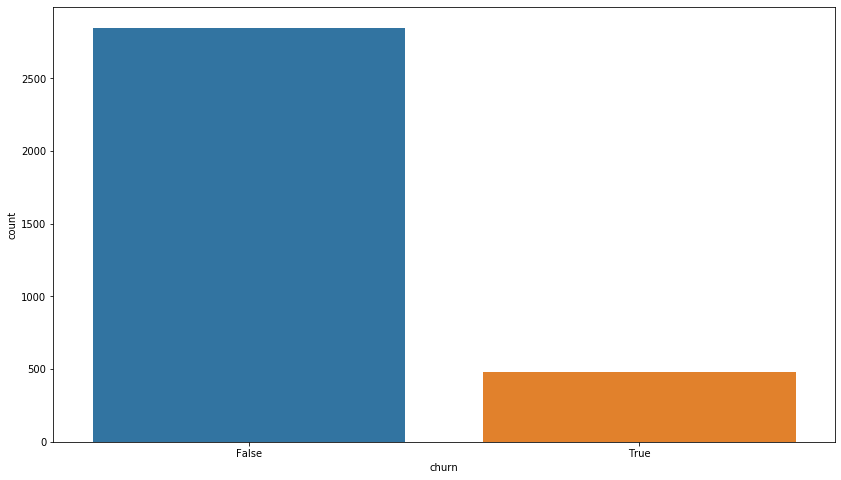

In [14]:
sns.countplot(pd_df['churn'])

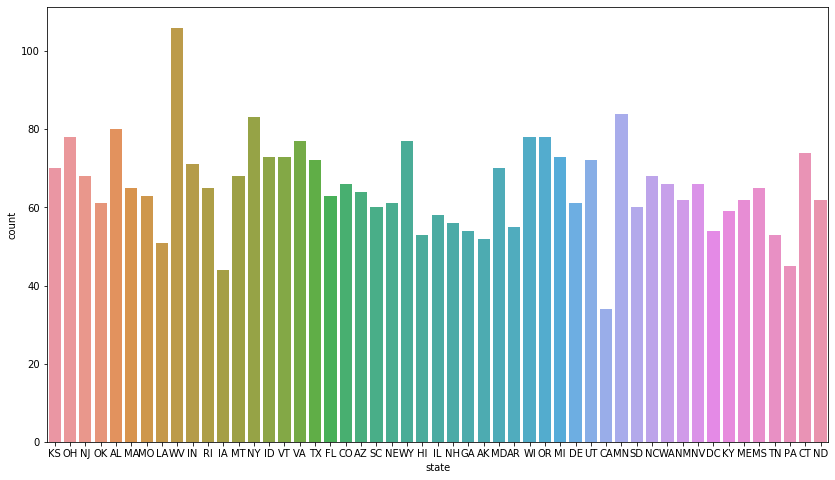

In [15]:
sns.countplot(pd_df['state'])

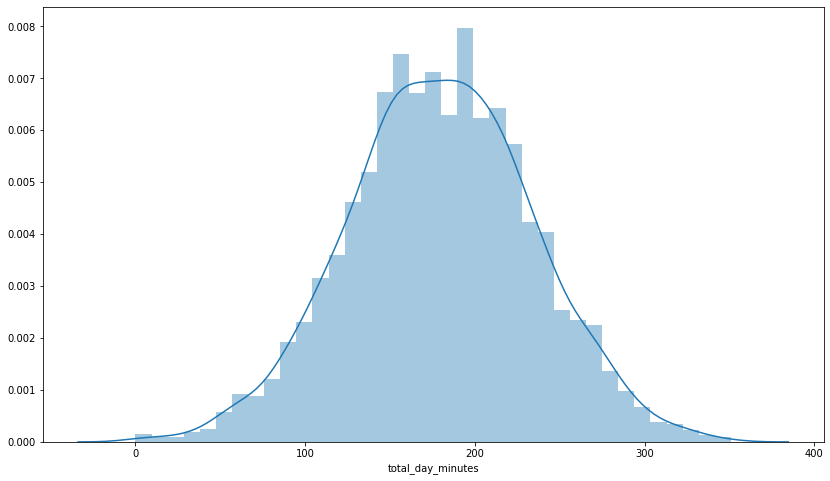

In [16]:
sns.distplot(pd_df['total_day_minutes'])

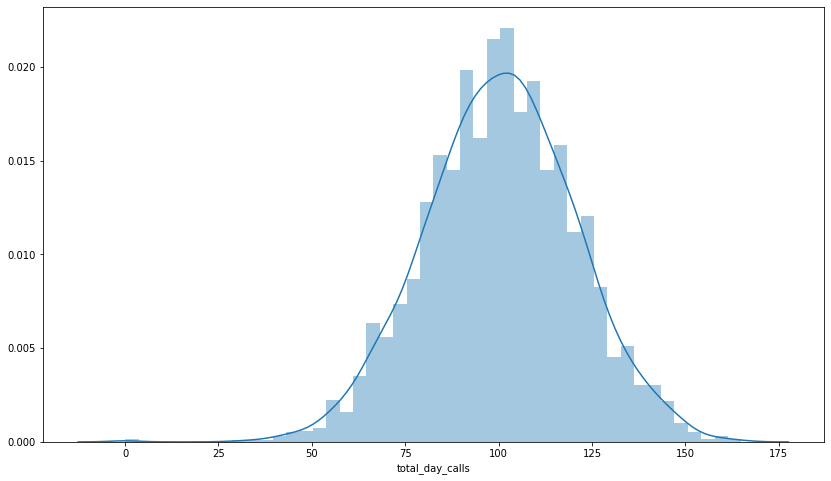

In [17]:
sns.distplot(pd_df['total_day_calls'])

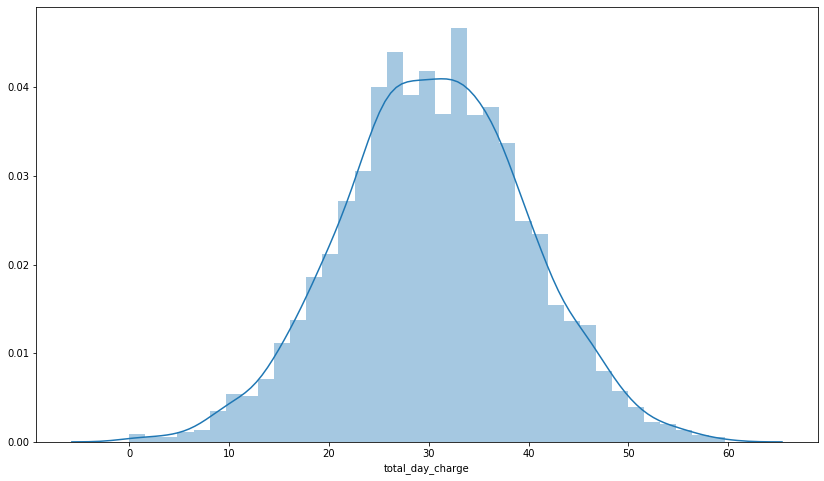

In [18]:
sns.distplot(pd_df['total_day_charge'])

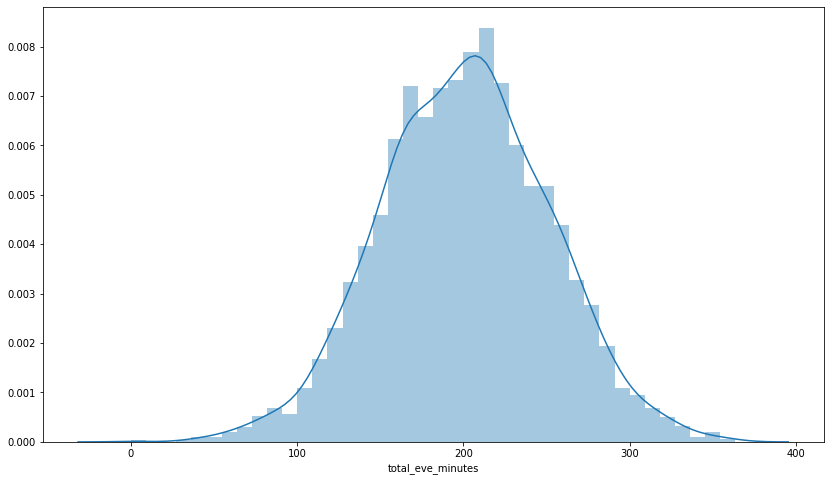

In [19]:
sns.distplot(pd_df['total_eve_minutes'])

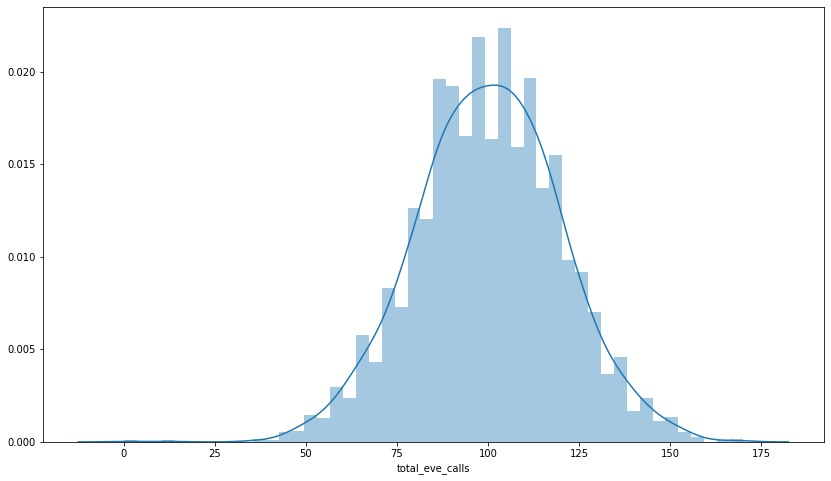

In [20]:
sns.distplot(pd_df['total_eve_calls'])

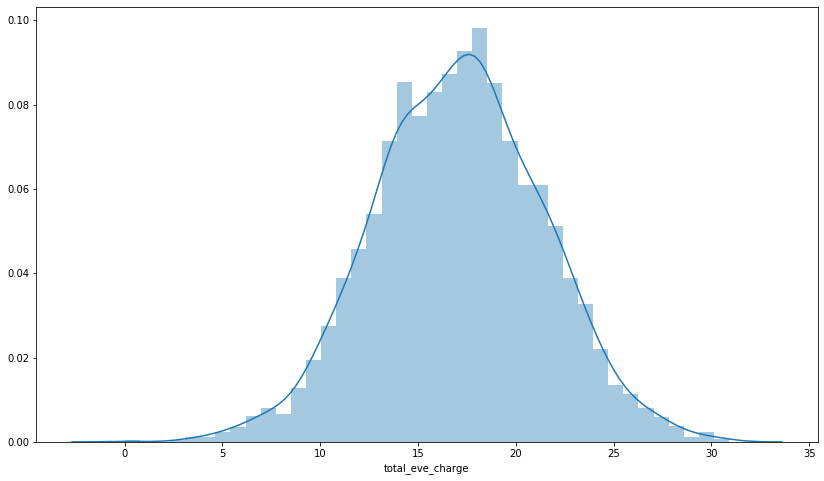

In [21]:
sns.distplot(pd_df['total_eve_charge'])

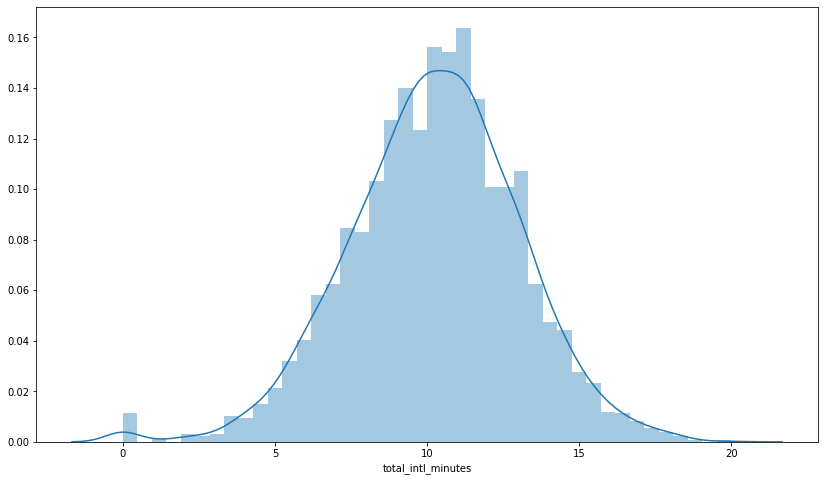

In [22]:
sns.distplot(pd_df['total_intl_minutes'])

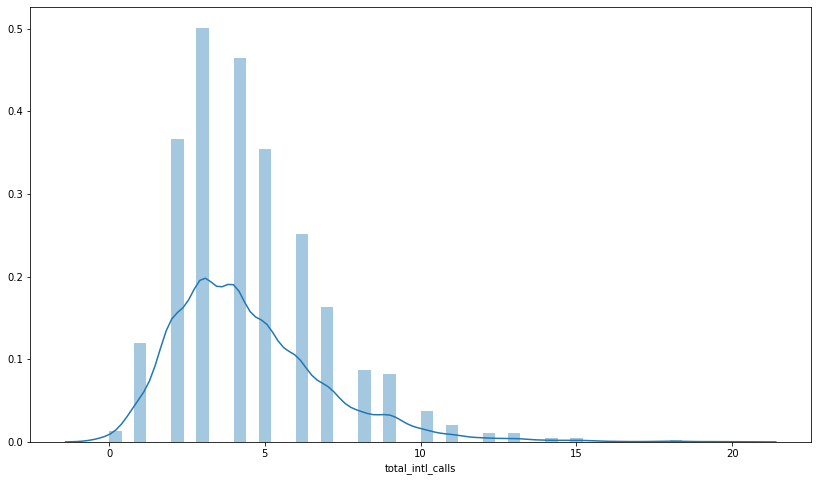

In [23]:
sns.distplot(pd_df['total_intl_calls'])

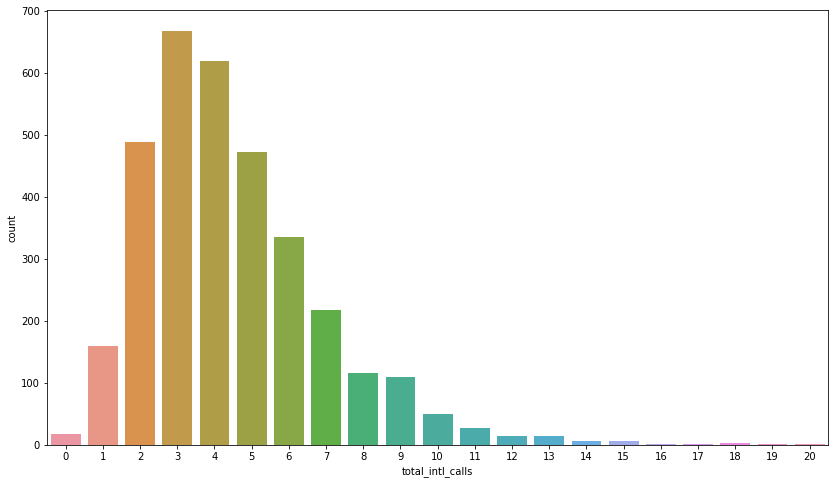

In [24]:
sns.countplot(pd_df['total_intl_calls'])

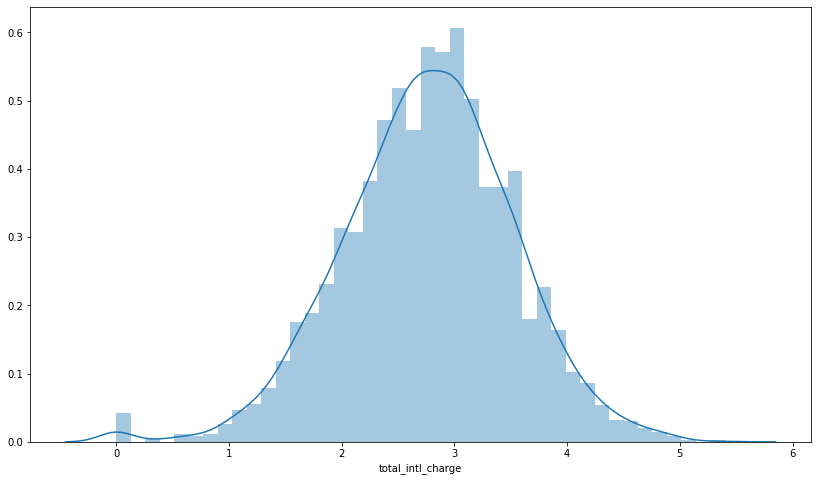

In [25]:
sns.distplot(pd_df['total_intl_charge'])

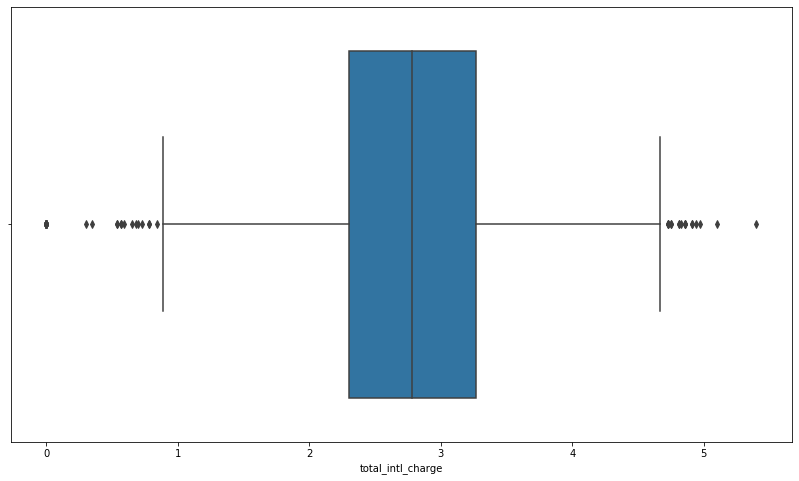

In [26]:
sns.boxplot(pd_df['total_intl_charge'])

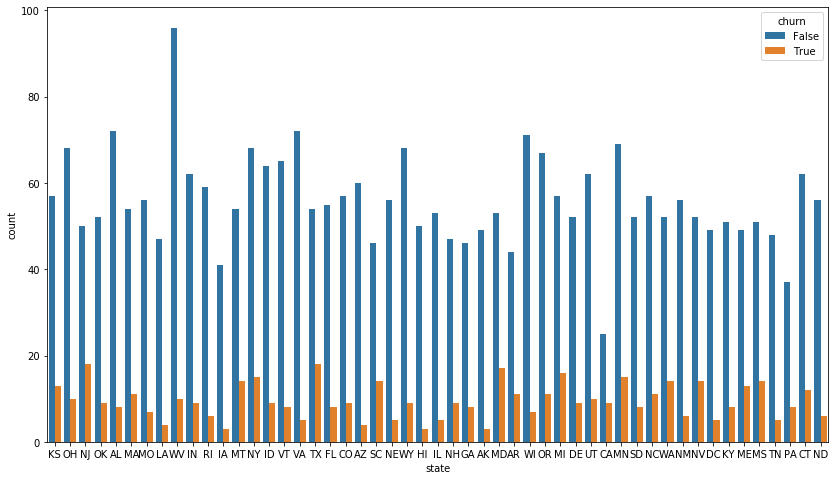

In [27]:
sns.countplot(pd_df['state'], hue = pd_df['churn'])

In [28]:
pd_df['churn']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

In [29]:
pd.DataFrame(pd_df[pd_df['churn'] == False].groupby('state')['churn'].count().sort_values(ascending = False))

,churn
state,
WV,96
AL,72
VA,72
WI,71
MN,69
NY,68
OH,68
WY,68
OR,67


In [30]:
pd_df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

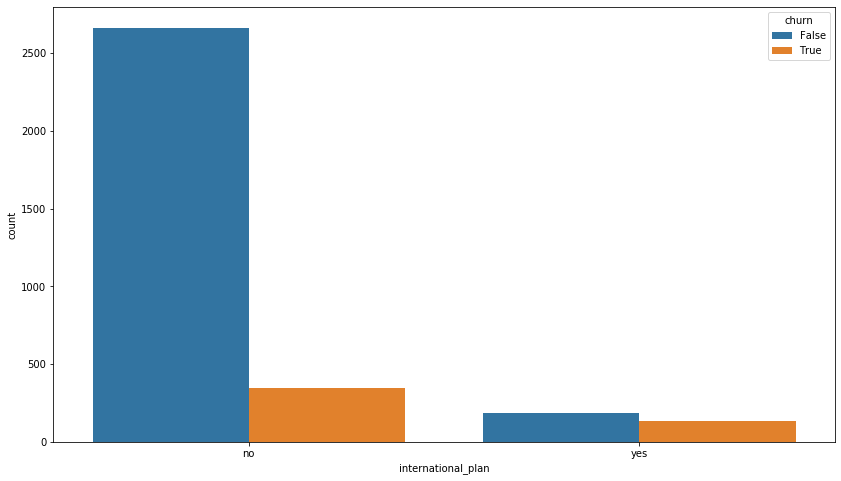

In [31]:
sns.countplot(pd_df['international_plan'], hue = pd_df['churn'])

In [32]:
pd_df['area_code'].unique()

array([415, 408, 510], dtype=int32)

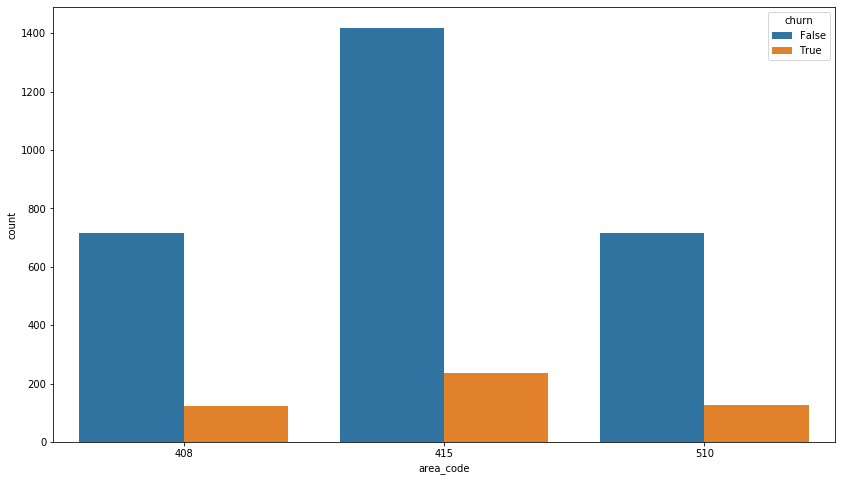

In [33]:
sns.countplot(pd_df['area_code'], hue = pd_df['churn'])

In [34]:
pd_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [35]:
pd_df['account_length'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [36]:
pd_df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [37]:
pd_df['voice_mail_plan'].value_counts()

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

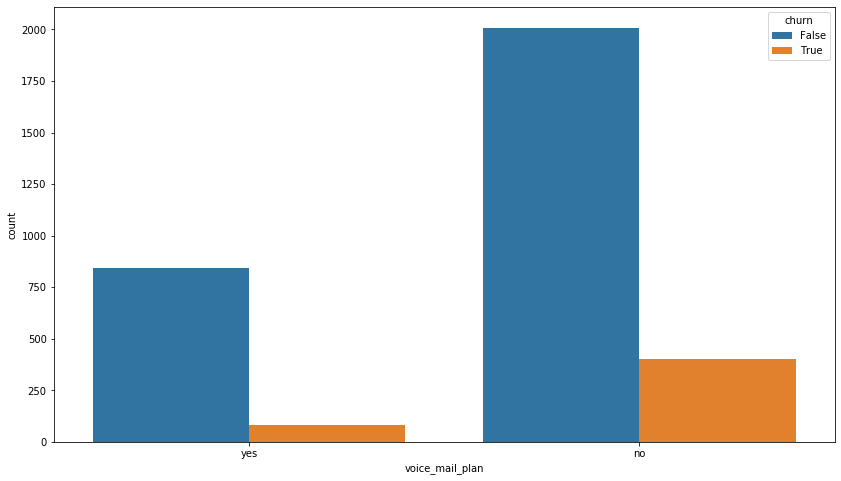

In [38]:
sns.countplot(pd_df['voice_mail_plan'], hue = pd_df['churn'])

In [39]:
pd_df['number_vmail_messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int32)

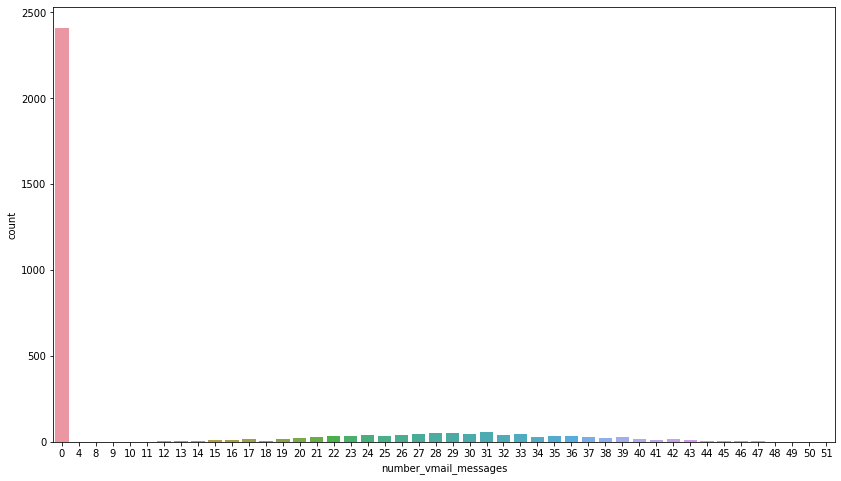

In [40]:
sns.countplot(pd_df['number_vmail_messages'])

In [41]:
pd_df[pd_df['churn'] == False].shape

(2850, 21)

In [42]:
pd_df[pd_df['churn'] == True].shape

(483, 21)

In [43]:
# we have imbalanced Data Set, we need to convert it into Balanced data Set

In [44]:
churn_true_df = pd_df[pd_df['churn'] == True]

churn_false_df = pd_df[pd_df['churn'] == False]

In [45]:
print("DIM of Churn_True : ", churn_true_df.shape)
print("DIM of Churn_False : ", churn_false_df.shape)

DIM of Churn_True :  (483, 21)
DIM of Churn_False :  (2850, 21)


In [46]:
churn_false_samp_df = churn_false_df.sample(483)

churn_false_samp_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
1340,HI,190,408,380-1096,no,no,0,150.9,86,25.65,...,129,22.83,179.9,73,8.10,14.7,1,3.97,1,False
151,NE,117,415,354-3436,no,no,0,102.8,119,17.48,...,91,17.57,299.0,105,13.46,10.1,7,2.73,1,False
50,IA,52,408,413-4957,no,no,0,191.9,108,32.62,...,96,22.93,236.8,87,10.66,7.8,5,2.11,3,False
58,WI,68,415,403-9733,no,no,0,148.8,70,25.30,...,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False
2685,OR,64,510,407-6391,no,no,0,213.5,93,36.30,...,114,14.16,122.0,78,5.49,14.1,3,3.81,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,NE,189,415,417-7888,no,yes,38,256.7,98,43.64,...,120,12.79,123.0,87,5.54,11.4,3,3.08,3,False
412,NE,85,415,416-5662,no,no,0,259.8,85,44.17,...,117,20.60,168.8,72,7.60,5.4,1,1.46,0,False
1981,ME,66,510,331-6270,no,no,0,118.0,133,20.06,...,99,21.09,214.4,122,9.65,5.3,5,1.43,1,False
1064,WY,185,415,405-7904,yes,yes,30,154.1,114,26.20,...,106,10.09,258.4,105,11.63,12.9,3,3.48,2,False


In [47]:
final_df = pd.concat([churn_true_df, churn_false_samp_df])

In [48]:
final_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [49]:
from sklearn.utils import shuffle

In [50]:
final_df = shuffle(final_df)

In [51]:
final_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
1136,WY,106,415,338-6018,yes,yes,26,270.3,111,45.95,...,90,18.29,254.0,133,11.43,14.4,7,3.89,1,True
1704,FL,144,510,384-5004,no,no,0,278.5,95,47.35,...,90,20.46,120.0,90,5.40,11.6,5,3.13,1,True
2076,NH,95,408,400-8538,yes,no,0,228.9,134,38.91,...,71,21.73,208.0,120,9.36,10.1,2,2.73,4,True
1531,DE,138,510,380-7816,yes,no,0,46.5,104,7.91,...,114,15.81,167.5,95,7.54,9.6,4,2.59,4,True
3030,MI,37,415,386-1131,no,no,0,191.4,116,32.54,...,99,14.23,216.5,112,9.74,14.0,5,3.78,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,MN,94,415,412-4399,no,no,0,181.5,98,30.86,...,88,16.99,287.7,114,12.95,6.6,5,1.78,1,False
366,NC,112,415,334-1872,no,no,0,193.3,96,32.86,...,123,22.45,128.6,115,5.79,9.1,3,2.46,4,False
1816,OR,53,415,386-1418,no,no,0,184.8,98,31.42,...,125,18.39,141.1,116,6.35,18.4,3,4.97,2,False
2377,ND,101,415,364-5510,no,yes,36,123.7,125,21.03,...,106,14.67,280.5,127,12.62,8.8,4,2.38,1,True


In [52]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 1136 to 914
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   966 non-null    object 
 1   account_length          966 non-null    int32  
 2   area_code               966 non-null    int32  
 3   phone_number            966 non-null    object 
 4   international_plan      966 non-null    object 
 5   voice_mail_plan         966 non-null    object 
 6   number_vmail_messages   966 non-null    int32  
 7   total_day_minutes       966 non-null    float64
 8   total_day_calls         966 non-null    int32  
 9   total_day_charge        966 non-null    float64
 10  total_eve_minutes       966 non-null    float64
 11  total_eve_calls         966 non-null    int32  
 12  total_eve_charge        966 non-null    float64
 13  total_night_minutes     966 non-null    float64
 14  total_night_calls       966 non-null   

In [54]:
cat_col = ['state','phone_number','international_plan','voice_mail_plan']

new_data = spark.createDataFrame(final_df)

new_data.show()

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----------------------+-----+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|customer_service_calls|churn|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-------------

In [55]:
new_data.count()

966

In [56]:
new_data.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: long (nullable = true)
 |-- area_code: long (nullable = true)
 |-- phone_number: string (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: long (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: long (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: long (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: long (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: long (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- customer_service_calls: long (nullable = true)
 |-- churn: boolean (nullable = true)



In [57]:
type(new_data)

pyspark.sql.dataframe.DataFrame

In [58]:
new_data.select('state', 'phone_number','international_plan','voice_mail_plan').show()

+-----+------------+------------------+---------------+
|state|phone_number|international_plan|voice_mail_plan|
+-----+------------+------------------+---------------+
|   WY|    338-6018|               yes|            yes|
|   FL|    384-5004|                no|             no|
|   NH|    400-8538|               yes|             no|
|   DE|    380-7816|               yes|             no|
|   MI|    386-1131|                no|             no|
|   AL|    418-3096|                no|            yes|
|   OH|    405-3097|                no|             no|
|   ME|    390-2891|                no|             no|
|   DC|    355-3801|                no|             no|
|   TN|    360-9038|                no|            yes|
|   WA|    359-2915|                no|            yes|
|   ME|    333-7631|                no|             no|
|   TX|    355-9366|               yes|            yes|
|   SC|    370-8676|                no|            yes|
|   MD|    373-7974|                no|         

In [59]:
input_col = ['international_plan','voice_mail_plan']

output_col = ['international_plan_index','voice_mail_plan_index']

In [60]:
SI = StringIndexer(inputCol = input_col, outputCol = output_col)
new_data=SI.fit(new_data).transform(new_data)
new_data.show(5)

In [62]:
from pyspark.ml.feature import OneHotEncoder,VectorAssembler

from pyspark.ml.classification import BinaryClassifier,RandomForestClassifier

In [ ]:
assembler = VectorAssembler(inputCols = ['number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'indexed_international_plan',
 'indexed_voice_mail_plan'], outputCol = "features")

In [ ]:
data = assembler.transform(df).select('label','features')
data.show(10)

In [ ]:
# train -test split

In [ ]:
train,test = final_df.randomSplit([0.8,0.2], seed = 13)


print("dim of data DF :",(data.count(),len(data.columns)))

print("dim of Train DF :",(train.count(),len(train.columns)))

print("dim of Test DF :",(test.count(),len(test.columns)))

In [ ]:
rfc = RandomForestClassifier(featuresCol = 'features',labelCol = 'labelIndex')

rfc_model = rfc.fit(train)

In [ ]:
pred_train_rfc = rfc_model.transform(train)

In [ ]:
pred_test_rfc = rfc_model.transform(test)

In [ ]:
pred_train_rfc.select('features','labelIndex','prediction').show()

In [ ]:
pred_test_rfc.select('features','labelIndex','prediction').show()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
accuracy_train = evaluator.evaluate(pred_train_rfc)
print("Train Data Accuracy = %s" % (accuracy_train))
print("Train Data Test Error = %s" % (1.0 - accuracy_train))

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
accuracy_test = evaluator.evaluate(pred_test_rfc)
print("Test Data Accuracy = %s" % (accuracy_test))
print("Test Data Test Error = %s" % (1.0 - accuracy_test))